In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import keras_tuner as kt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/DEHRADUN, UK, INDIA.csv')
df.head()

,name,latitude,longitude,tempmax,tempmin,temp,dew,humidity,precip,precipprob,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,source
datetime,,,,,,,,,,,,,,,,,,,,,
01-01-2017,"DEHRADUN, UK, INDIA",30.31,78.049,23.1,7.9,14.0,8.6,72.7,12.0,100,...,12.5,6,NaN,2017-01-01T07:14:29,2017-01-01T17:28:20,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,obs
02-01-2017,"DEHRADUN, UK, INDIA",30.31,78.049,22.2,7.4,13.8,8.7,73.7,0.1,100,...,13.5,6,NaN,2017-01-02T07:14:43,2017-01-02T17:29:03,0.14,Rain,Clear conditions throughout the day with after...,rain,obs
03-01-2017,"DEHRADUN, UK, INDIA",30.31,78.049,23.9,7.4,13.4,8.6,76.2,0.0,0,...,11.8,6,NaN,2017-01-03T07:14:55,2017-01-03T17:29:47,0.18,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,obs
04-01-2017,"DEHRADUN, UK, INDIA",30.31,78.049,23.1,7.5,13.6,9.0,76.1,0.0,0,...,13.6,6,NaN,2017-01-04T07:15:05,2017-01-04T17:30:32,0.21,Clear,Clear conditions throughout the day.,clear-day,obs
05-01-2017,"DEHRADUN, UK, INDIA",30.31,78.049,22.1,6.8,12.8,8.5,77.7,0.0,0,...,13.5,6,NaN,2017-01-05T07:15:14,2017-01-05T17:31:17,0.25,Clear,Clear conditions throughout the day.,clear-day,obs


In [ ]:
df.tail()

,name,latitude,longitude,tempmax,tempmin,temp,dew,humidity,precip,precipprob,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,source
datetime,,,,,,,,,,,,,,,,,,,,,
13-04-2025,"Dehradun, UK, India",30.31,78.049,32.8,16.7,24.3,10.6,46.5,0.0,0,...,24.9,9,10.0,2025-04-13T05:53:02,2025-04-13T18:44:11,0.50,Clear,Clear conditions throughout the day.,clear-day,obs
14-04-2025,"Dehradun, UK, India",30.31,78.049,33.3,19.1,26.1,11.2,42.1,0.0,0,...,24.8,9,10.0,2025-04-14T05:51:54,2025-04-14T18:44:49,0.54,Clear,Clear conditions throughout the day.,clear-day,obs
15-04-2025,"Dehradun, UK, India",30.31,78.049,30.4,21.3,25.9,10.3,38.3,0.0,0,...,10.1,5,10.0,2025-04-15T05:50:47,2025-04-15T18:45:26,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,obs
16-04-2025,"Dehradun, UK, India",30.31,78.049,32.5,22.1,27.2,11.3,38.2,0.0,0,...,17.0,8,10.0,2025-04-16T05:49:41,2025-04-16T18:46:04,0.61,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,obs
17-04-2025,"Dehradun, UK, India",30.31,78.049,35.8,22.3,28.4,11.2,36.3,0.1,100,...,24.8,9,10.0,2025-04-17T05:48:36,2025-04-17T18:46:42,0.64,Rain,Clear conditions throughout the day with morni...,rain,obs


In [ ]:
df.columns

Index(['name', 'latitude', 'longitude', 'tempmax', 'tempmin', 'temp', 'dew',
       'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'windgust', 'windspeed', 'windspeedmean', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'source'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 01-01-2017 to 17-04-2025
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3029 non-null   object 
 1   latitude          3029 non-null   float64
 2   longitude         3029 non-null   float64
 3   tempmax           3029 non-null   float64
 4   tempmin           3029 non-null   float64
 5   temp              3029 non-null   float64
 6   dew               3029 non-null   float64
 7   humidity          3029 non-null   float64
 8   precip            3029 non-null   float64
 9   precipprob        3029 non-null   int64  
 10  precipcover       3029 non-null   float64
 11  preciptype        1682 non-null   object 
 12  snow              3029 non-null   int64  
 13  windgust          3029 non-null   float64
 14  windspeed         3029 non-null   float64
 15  windspeedmean     3029 non-null   float64
 16  winddir           3029 non-null 

In [ ]:
df.describe()

,latitude,longitude,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,...,windspeedmean,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3.029000e+03,3.029000e+03,3029.00000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,...,3029.000000,3029.000000,3029.000000,3029.000000,3028.000000,3029.000000,3029.000000,3029.000000,1194.000000,3029.000000
mean,3.031000e+01,7.804900e+01,28.50657,16.076197,21.418884,15.661571,73.207032,5.782734,55.397821,5.724236,...,4.236943,196.208088,1009.030967,39.127006,8.199273,204.447078,17.657412,7.215583,16.076214,0.483404
std,1.289848e-12,8.385789e-13,5.56342,6.826389,6.276399,6.223676,13.698183,16.002676,49.715989,8.280323,...,1.210546,119.815940,6.548529,31.580132,21.080108,62.789106,5.433305,1.728255,12.745233,0.288316
min,3.031000e+01,7.804900e+01,11.40000,1.100000,7.800000,3.100000,31.300000,0.000000,0.000000,0.000000,...,1.700000,0.100000,991.400000,0.000000,0.900000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,3.031000e+01,7.804900e+01,24.30000,9.900000,15.700000,10.400000,65.800000,0.000000,0.000000,0.000000,...,3.400000,79.000000,1003.500000,9.700000,2.000000,162.800000,14.000000,6.000000,10.000000,0.250000
50%,3.031000e+01,7.804900e+01,29.60000,16.700000,23.100000,14.300000,77.100000,0.100000,100.000000,4.170000,...,4.000000,215.000000,1009.200000,32.200000,2.800000,199.500000,17.200000,7.000000,10.000000,0.500000
75%,3.031000e+01,7.804900e+01,32.50000,22.800000,26.800000,22.300000,83.100000,2.600000,100.000000,8.330000,...,4.800000,308.700000,1014.800000,66.100000,16.700000,250.900000,21.700000,8.000000,10.000000,0.750000
max,3.031000e+01,7.804900e+01,42.80000,27.700000,34.400000,26.100000,98.500000,169.200000,100.000000,58.330000,...,12.000000,360.000000,1023.100000,100.000000,1100.600000,342.100000,29.700000,10.000000,75.000000,0.980000


In [ ]:
df.isnull().sum()

,0
name,0
latitude,0
longitude,0
tempmax,0
tempmin,0
temp,0
dew,0
humidity,0
precip,0
precipprob,0


**step** 1: Data Preprocessing

In [ ]:
def load_and_preprocess_data(file_path):
    # Load dataset
    df = pd.read_csv(file_path, parse_dates=['datetime'])

    # Convert datetime to proper format and set as index
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y')
    df.set_index('datetime', inplace=True)

    # Select relevant features
    features = ['temp', 'dew', 'humidity', 'precip', 'windspeedmean', 'sealevelpressure', 'cloudcover']
    df = df[features]

    # Handle missing values
    df.fillna(method='ffill', inplace=True)

    # Define rainfall categories based on thresholds
    def categorize_rainfall(precip):
        if precip == 0:
          return "No rainfall"
        elif 0.1 <= precip <= 2.49:
          return "Light rain (drizzle)"
        elif 2.50 <= precip <= 7.59:
          return "Light rain"
        elif 7.60 <= precip <= 35.59:
          return "Moderate rain"
        elif 35.60 <= precip <= 64.49:
          return "Heavy rain"
        elif 64.50 <= precip <= 124.4:
          return "Very heavy rain"
        else:
          return "Extremely heavy rain"

    df['rain_category'] = df['precip'].apply(categorize_rainfall)

    # Feature engineering
    df['dew_point_spread'] = df['temp'] - df['dew']
    df['humidity_cloudcover'] = df['humidity'] * df['cloudcover']
    features = ['temp', 'dew', 'humidity', 'precip', 'windspeedmean', 'sealevelpressure',
                'cloudcover', 'dew_point_spread', 'humidity_cloudcover']
    df = df[features + ['rain_category']]
    return df, categorize_rainfall

# Run the function
file_path = '/content/DEHRADUN, UK, INDIA.csv'
df, categorize_rainfall = load_and_preprocess_data(file_path)
print("Preprocessed DataFrame:")
print(df.head())

Preprocessed DataFrame:
            temp  dew  humidity  precip  windspeedmean  sealevelpressure  \
datetime                                                                   
2017-01-01  14.0  8.6      72.7    12.0            4.5            1017.5   
2017-01-02  13.8  8.7      73.7     0.1            4.4            1018.7   
2017-01-03  13.4  8.6      76.2     0.0            4.1            1018.6   
2017-01-04  13.6  9.0      76.1     0.0            3.3            1016.2   
2017-01-05  12.8  8.5      77.7     0.0            3.9            1014.9   

            cloudcover  dew_point_spread  humidity_cloudcover  \
datetime                                                        
2017-01-01        34.8               5.4              2529.96   
2017-01-02        15.8               5.1              1164.46   
2017-01-03        31.3               4.8              2385.06   
2017-01-04        13.5               4.6              1027.35   
2017-01-05        12.4               4.3             

**step** 2: Exploratory Data Analysis (EDA)

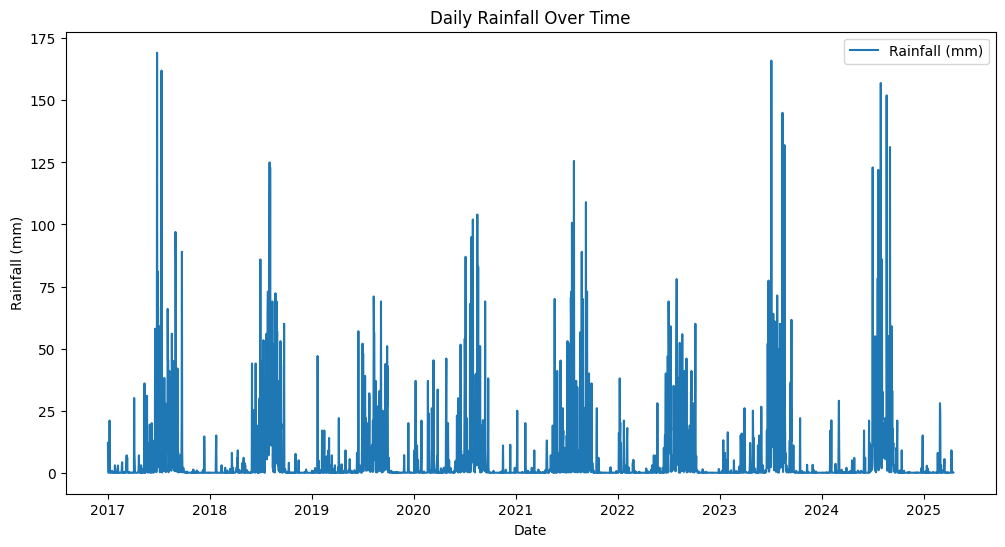

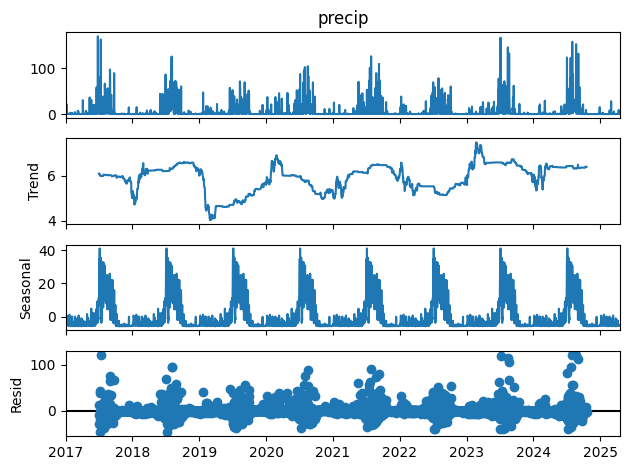

Correlation with precip:
precip                 1.000000
humidity_cloudcover    0.499919
cloudcover             0.456737
dew                    0.396487
humidity               0.323496
temp                   0.223983
windspeedmean         -0.182685
dew_point_spread      -0.282959
sealevelpressure      -0.317831
Name: precip, dtype: float64


In [ ]:
def analyze_correlations(df):
    # Compute correlation matrix
    numeric_df = df.select_dtypes(include=np.number)
    correlation_matrix = numeric_df.corr()

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Features')
    plt.savefig('correlation_heatmap.png')
    plt.close()

    # Print correlations with precip
    print("Correlation with precip:")
    print(correlation_matrix['precip'].sort_values(ascending=False))

def perform_eda(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['precip'], label='Rainfall (mm)')
    plt.title('Daily Rainfall Over Time')
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')
    plt.legend()
    plt.savefig('rainfall_time_series.png')
    plt.show()

    # Seasonal decomposition
    decomposition = seasonal_decompose(df['precip'], model='additive', period=365)
    decomposition.plot()
    plt.savefig('seasonal_decomposition.png')
    plt.show()

    # Correlation analysis
    analyze_correlations(df)

# Run EDA
perform_eda(df)

**step3**: Arima Model for Regression

In [ ]:
def arima_forecast(df, forecast_days=150):
    # Ensure the index is datetime
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)


    # Find best p, d, q
    warnings.filterwarnings("ignore")  # Ignore convergence warnings

    best_aic = float('inf')
    best_order = None

    # Define ranges to search
    p_values = range(0, 5)
    d_values = range(0, 3)
    q_values = range(0, 5)

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(df['precip'], order=(p,d,q))
                    model_fit = model.fit()
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"Best ARIMA order found: {best_order} with AIC: {best_aic}")

    # Fit the best ARIMA model
    best_model = ARIMA(df['precip'], order=best_order)
    best_model_fit = best_model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=forecast_days)

    # Create forecast index
    last_date = df.index[-1]
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days, freq='D')

    return forecast, forecast_index

# Run ARIMA forecast
arima_pred, forecast_index = arima_forecast(df)
print("ARIMA Forecast (first 15 days):")
print(arima_pred[:15])

Best ARIMA order found: (4, 0, 4) with AIC: 24772.256284028757
ARIMA Forecast (first 15 days):
2025-04-18    0.882904
2025-04-19    0.759738
2025-04-20    1.211398
2025-04-21    0.531152
2025-04-22    1.426361
2025-04-23    0.358113
2025-04-24    1.535218
2025-04-25    0.300847
2025-04-26    1.519987
2025-04-27    0.368400
2025-04-28    1.385360
2025-04-29    0.543883
2025-04-30    1.159619
2025-05-01    0.789210
2025-05-02    0.888629
Freq: D, Name: predicted_mean, dtype: float64


**step**4:LSTM Model for Regression

In [ ]:
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', 50, 200, step=50),
                   return_sequences=True, input_shape=(30, 1)))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units2', 50, 100, step=25)))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(
        hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')), loss='mse')
    return model

def lstm_forecast(df, forecast_days=150, model=None):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[['precip']].values)

    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    seq_length = 30
    X, y = create_sequences(scaled_data, seq_length)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    if model is None:
        # Build LSTM model
        model = Sequential()
        model.add(LSTM(100, return_sequences=True, input_shape=(seq_length, 1)))
        model.add(Dropout(0.2))  # Add dropout to prevent overfitting
        model.add(LSTM(50))
        model.add(Dropout(0.2))
        model.add(Dense(25, activation='relu'))
        model.add(Dense(1))

        # Custom optimizer with tuned learning rate
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='mse')

        # Early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train model
        model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1,
                  callbacks=[early_stopping], verbose=1)

    # Forecast
    last_sequence = scaled_data[-seq_length:]
    forecast = []

    for _ in range(forecast_days):
        last_sequence_reshaped = last_sequence.reshape((1, seq_length, 1))
        next_pred = model.predict(last_sequence_reshaped, verbose=0)
        forecast.append(next_pred[0, 0])
        last_sequence = np.roll(last_sequence, -1)
        last_sequence[-1] = next_pred

    # Inverse transform
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

    # Create forecast index
    last_date = df.index[-1]
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days, freq='D')

    # Evaluate on test set
    test_predictions = model.predict(X_test, verbose=0)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test_inv = scaler.inverse_transform(y_test)
    mse = mean_squared_error(y_test_inv, test_predictions)
    print(f"LSTM Test MSE: {mse:.4f}")

    return forecast.flatten(), forecast_index

# LSTM hyperparameter tuning
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['precip']].values)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

tuner = kt.Hyperband(build_lstm_model, objective='val_loss', max_epochs=50, directory='lstm_tuner')
tuner.search(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[EarlyStopping(patience=5)])
best_model = tuner.get_best_models(num_models=1)[0]

# LSTM forecast with tuned model
lstm_pred, _ = lstm_forecast(df, model=best_model)
print("LSTM Forecast (first 15 days):")
print(lstm_pred[:15])

Trial 90 Complete [00h 01m 27s]
val_loss: 0.01321076788008213

Best val_loss So Far: 0.012867504730820656
Total elapsed time: 00h 57m 23s
LSTM Test MSE: 200.4958
LSTM Forecast (first 15 days):
[2.2616072 3.3394182 3.711396  4.049291  4.4154806 4.798016  5.190627
 5.5913157 5.999463  6.4146614 6.8360705 7.263617  7.6964293 8.133584
 8.574186 ]


**step 5**:Binary Classification (Rain vs. No Rain)

In [ ]:
def binary_classification(df):
    # Create binary target (1 for rain, 0 for no rain)
    df['rain_binary'] = (df['precip'] > 0).astype(int)

    # Features and target
    X = df[['temp', 'dew', 'humidity', 'windspeedmean', 'sealevelpressure',
            'cloudcover', 'dew_point_spread', 'humidity_cloudcover']]
    y = df['rain_binary']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    # Train Random Forest
    clf = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_clf = grid_search.best_estimator_
    print("Best Random Forest Parameters:", grid_search.best_params_)

    y_pred = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    feature_importance = pd.Series(best_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("Feature Importance:\n", feature_importance)
    return best_clf, accuracy, f1, X_test, y_test

# Run binary classification
clf, accuracy, f1, X_test, y_test = binary_classification(df)
print(f"Binary Classification - Accuracy: {accuracy:.2f}, F1-Score: {f1:.2f}")

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Feature Importance:
 cloudcover             0.241655
humidity_cloudcover    0.206018
dew                    0.177351
temp                   0.105029
sealevelpressure       0.083952
windspeedmean          0.071027
humidity               0.064695
dew_point_spread       0.050271
dtype: float64
Binary Classification - Accuracy: 0.85, F1-Score: 0.85


**step6t**:Model Evaluation

Confusion Matrix:
 [[246  28]
 [ 64 268]]


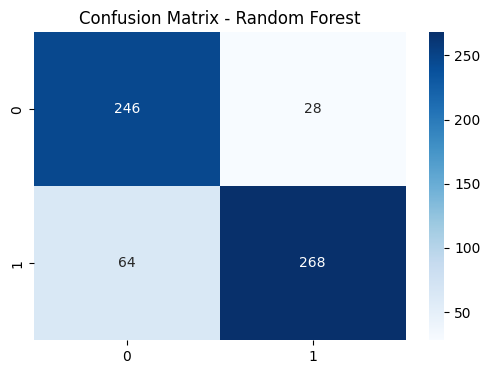

In [ ]:
def evaluate_models(df, clf, X_test, y_test, arima_pred, lstm_pred, forecast_index):
    # Classification evaluation
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Regression evaluation (compare last 30 days of actual vs. forecast)
    actual = df['precip'][-30:].values
    if len(actual) == len(arima_pred):
        arima_mse = mean_squared_error(actual, arima_pred[:len(actual)])
        lstm_mse = mean_squared_error(actual, lstm_pred[:len(actual)])
        print(f"ARIMA Forecast MSE: {arima_mse:.4f}")
        print(f"LSTM Forecast MSE: {lstm_mse:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Random Forest')
    plt.savefig('confusion_matrix.png')
    plt.show()

# Run evaluation
evaluate_models(df, clf, X_test, y_test, arima_pred, lstm_pred, forecast_index)

**step7**:Visualization of Forecast

In [ ]:
def plot_forecast(df, arima_forecast, lstm_forecast, forecast_index):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-100:], df['precip'][-100:], label='Actual Rainfall', color='blue')
    plt.plot(forecast_index, arima_forecast, label='ARIMA Forecast', color='red')
    plt.plot(forecast_index, lstm_forecast, label='LSTM Forecast', color='green')
    plt.title('Rainfall Forecast vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')
    plt.legend()
    plt.savefig('forecast_plot.png')
    plt.close()

# Run forecast visualization
plot_forecast(df, arima_pred, lstm_pred, forecast_index)

In [ ]:
# Create and save forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'ARIMA_Forecast_mm': arima_pred,
    'LSTM_Forecast_mm': lstm_pred,
    'Rain_Category': [categorize_rainfall(x) for x in lstm_pred]
})
forecast_df.to_csv('rainfall_forecast_output.csv')
print("Forecast output saved to 'rainfall_forecast_output.csv'")

Forecast output saved to 'rainfall_forecast_output.csv'


In [ ]:
# Print final results
print(f"Binary Classification - Accuracy: {accuracy:.2f}, F1-Score: {f1:.2f}")
print("Forecast output saved to 'rainfall_forecast_output.csv'")
print("Plots saved: 'rainfall_time_series.png', 'seasonal_decomposition.png', 'forecast_plot.png', 'correlation_heatmap.png', 'confusion_matrix.png'")

Binary Classification - Accuracy: 0.85, F1-Score: 0.85
Forecast output saved to 'rainfall_forecast_output.csv'
Plots saved: 'rainfall_time_series.png', 'seasonal_decomposition.png', 'forecast_plot.png', 'correlation_heatmap.png', 'confusion_matrix.png'


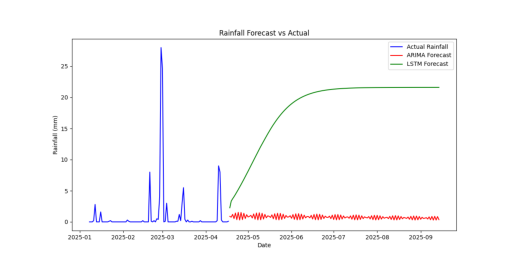

In [ ]:
#this forecast plot is for 30 days

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
def read_and_show_png(image_path):
  """Reads and displays a PNG image.

  Args:
    image_path: The path to the PNG image file.
  """
  try:
    img = mpimg.imread('/content/forecast_plot.png')
    plt.imshow(img)
    plt.axis('off')
    plt.show()
  except FileNotFoundError:
    print(f"Error: Image file not found at {'/content/forecast_plot.png'}")
  except Exception as e:
    print(f"An error occurred: {e}")


read_and_show_png('/content/forecast_plot.png')


In [ ]:
forecast=pd.read_csv('/content/rainfall_forecast_output.csv')
forecast

,Unnamed: 0,Date,ARIMA_Forecast_mm,LSTM_Forecast_mm,Rain_Category
0,2025-04-18,2025-04-18,0.882904,2.261607,Light rain (drizzle)
1,2025-04-19,2025-04-19,0.759738,3.339418,Light rain
2,2025-04-20,2025-04-20,1.211398,3.711396,Light rain
3,2025-04-21,2025-04-21,0.531152,4.049291,Light rain
4,2025-04-22,2025-04-22,1.426361,4.415481,Light rain
...,...,...,...,...,...
145,2025-09-10,2025-09-10,0.290563,21.607527,Moderate rain
146,2025-09-11,2025-09-11,0.897471,21.607615,Moderate rain
147,2025-09-12,2025-09-12,0.294428,21.607700,Moderate rain
148,2025-09-13,2025-09-13,0.853706,21.607775,Moderate rain
